

---



# preprocessing_v1
- winsorize 시각화 부분은 실행 시간이 길어서 임시로 주석 처리했습니다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업 디렉토리 변경
import os
print(os.getcwd(), end=' -> ')
os.chdir('/content/drive/MyDrive/PatternRecognition/project')
print(os.getcwd())

/content -> /content/drive/MyDrive/PatternRecognition/project


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# CSV 파일 불러오기
df = pd.read_csv('train.csv')
df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [ ]:
df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


## 데이터 전처리

(0.0, 20000.0)

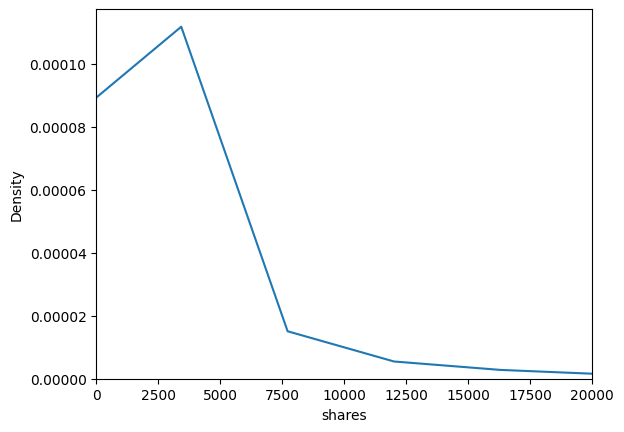

In [ ]:
# 공유 수 분포 그래프
sns.kdeplot(df['shares'])
plt.xlim(0, 20000)

In [ ]:
# 이상치 제거 비율에 따른 수치 통계

from scipy.stats import skew, kurtosis

quantiles = [1.0, 0.998, 0.995, 0.99, 0.98, 0.975]
summary_list = []

for q in quantiles:
    threshold = df['shares'].quantile(q)
    temp = df[df['shares'] <= threshold]['shares']

    summary = {
        'quantile': q,
        'count': temp.count(),
        'mean': temp.mean(),
        'std': temp.std(),
        'skew': skew(temp),
        'kurtosis': kurtosis(temp),
        'min': temp.min(),
        'max': temp.max()
    }

    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
print(summary_df)


   quantile  count         mean           std       skew     kurtosis  min  \
0     1.000  22200  3459.794865  12767.254516  34.564296  1777.645277   22   
1     0.998  22155  3075.768269   5730.182933   6.628787    59.428030   22   
2     0.995  22090  2891.559439   4596.721530   5.102655    34.846652   22   
3     0.990  21978  2694.451224   3655.563807   3.813214    18.020655   22   
4     0.980  21760  2468.876333   2873.139893   3.020613    10.499472   22   
5     0.975  21648  2384.638258   2629.522184   2.816273     8.936662   22   

      max  
0  843300  
1   86200  
2   53100  
3   32100  
4   20400  
5   17300  


quantile = 0.98 에서 mean, std, skew(첨도), kurtosis(왜도)의 급격한 변화가 관찰된다. 따라서 shares가 상위 2%에 해당하는 데이터를 이상치로 간주하고 제거한다.

(0.0, 8500.0)

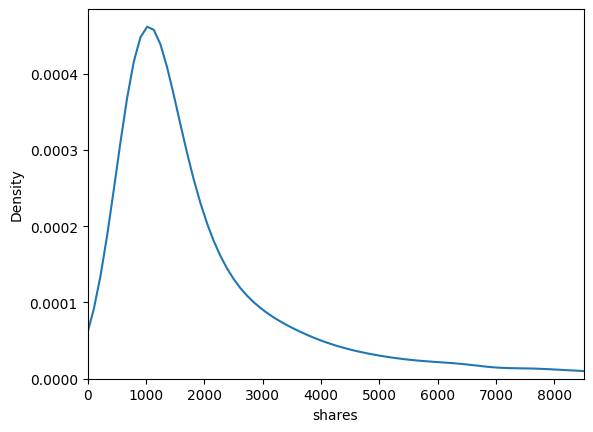

In [ ]:
threshold = df['shares'].quantile(0.98)
df = df[df['shares'] <= threshold]

sns.kdeplot(df['shares'])
plt.xlim(0, 8500)

In [ ]:
# 가장 많이 등장한 값이 전체에서 차지하는 비율 top 10
top_ratio_dict = {}

for col in df.columns:
    most_common = df[col].value_counts(dropna=False).iloc[0]
    total = len(df)
    ratio = most_common / total
    top_ratio_dict[col] = ratio

top_10 = sorted(top_ratio_dict.items(), key=lambda x: x[1], reverse=True)[:10]

for col, ratio in top_10:
    print(f"{col}: {ratio:.2%}")

kw_max_max: 68.35%
num_videos: 56.65%
kw_min_min: 51.76%
y: 51.45%
abs_title_subjectivity: 46.69%
title_sentiment_polarity: 45.63%
abs_title_sentiment_polarity: 45.57%
num_imgs: 41.48%
title_subjectivity: 40.89%
kw_min_avg: 38.98%


In [ ]:
# 중복 값이 많은 변수들을 자세히 살펴보자
df['kw_min_min'].value_counts(dropna=False).head(5)

,count
kw_min_min,
-1.0,11263
4.0,5955
217.0,2323
NaN,2167
0.0,34


In [ ]:
df['kw_max_max'].value_counts(dropna=False).head(5)

,count
kw_max_max,
843300.0,14873
NaN,2193
690400.0,1982
617900.0,1115
69100.0,645


In [ ]:
df['n_non_stop_words_rounded'] = df['n_non_stop_words'].round(3)  # 소수 셋째 자리까지 반올림
df['n_non_stop_words_rounded'].value_counts(dropna=False)

,count
n_non_stop_words_rounded,
1.0,19041
NaN,2139
0.0,580


In [ ]:
# 많은 값들이 같은 값을 가지므로 삭제한다
df.drop(columns=['kw_min_min'], axis=1, inplace=True)
df.drop(columns=['kw_max_max'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words_rounded'], axis=1, inplace=True)

In [ ]:
# 'id'는 각 샘플마다 고유한 값을 가진다. 학습에 사용할 값이 아니므로 삭제한다
df.drop(columns=['id'], axis=1, inplace=True)

In [ ]:
# # Scatter plot

X = df.drop(columns=['shares', 'y'])
X = X.select_dtypes(include=['number']) # 숫자형만 필터링
y = df['shares']
target = 'shares'

# # 시각화
# plt.figure(figsize=(18, 20))

# for i, feature in enumerate(X.columns):
#     plt.subplot(7, 6, i + 1)
#     plt.tight_layout(pad=1.5)
#     plt.scatter(X[feature], y, alpha=0.3)
#     plt.xlabel(feature)
#     plt.ylabel(target)

# plt.tight_layout()
# plt.show()

In [ ]:
# winsorize
from scipy.stats.mstats import winsorize
feature_with_outliers = ["n_tokens_content", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "kw_max_min", "kw_avg_min", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "global_rate_positive_words", "global_rate_negative_words", "avg_positive_polarity", "min_positive_polarity"]

# Define the percentile thresholds for Winsorization
lower_percentile = 0.0
upper_percentile = 0.0002

# Apply Winsorization to each input variable
for feature in X.columns:
    if feature in feature_with_outliers:
      X[feature] = winsorize(X[feature], limits=(lower_percentile, upper_percentile))


In [ ]:
# 요일별 shares의 평균, 최댓값, 최솟값
weekday_stats = df.groupby('weekday')['shares'].agg(
    avg_shares=lambda x: round(x.mean(), 2),
    max_shares='max',
    min_shares='min'
).reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats = weekday_stats.sort_values('weekday')
print(weekday_stats)

     weekday  avg_shares  max_shares  min_shares
1     Monday     2384.82       20300          43
5    Tuesday     2355.24       20400          42
6  Wednesday     2354.53       20300          48
4   Thursday     2357.35       20400          22
0     Friday     2436.35       20400          28
2   Saturday     3117.37       19800          49
3     Sunday     3060.14       20000         171


In [ ]:
# 결측치 처리
for col in df.columns:
    if df[col].dtype == 'object': # 범주형 → 최빈값
        df[col] = df[col].fillna(df[col].mode())
    else: # 숫자형 → 중간값
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# is_weekend 변수 추가
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

# 범주형 데이터 One-Hot Encoding
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)



---



# Bagging_gscv_v0
해주신 것:
- shares 너무 높은 것 outlier로 판단해 삭제
- winsorize
- 겹치는 값이 많은 변수들 3개, id 삭제
- is_weekend 추가
- 결측치 채우기
- categorical 변수들 one-hot encoding
- 결과물은 df에 담겨 있음 <a/></a>

해야 할 것:
- train과 validation set 나누기
- 정규화
- classification 모델 선정
 - (패인 랩세션 4-1 참고) Bagging 모델로 GridSearchCV를 해보자. (k-fold 활용)
 - GridSearchCV 내부에서 커스텀 평가지표 "(Accuracy + F1 score + AUC) / 3"을 사용하게끔 만들기

## 전처리 (train, val 나누기) (정규화)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21760 entries, 0 to 22199
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                21760 non-null  float64
 1   n_tokens_content              21760 non-null  float64
 2   n_unique_tokens               21760 non-null  float64
 3   n_non_stop_unique_tokens      21760 non-null  float64
 4   num_hrefs                     21760 non-null  float64
 5   num_self_hrefs                21760 non-null  float64
 6   num_imgs                      21760 non-null  float64
 7   num_videos                    21760 non-null  float64
 8   average_token_length          21760 non-null  float64
 9   num_keywords                  21760 non-null  float64
 10  kw_max_min                    21760 non-null  float64
 11  kw_avg_min                    21760 non-null  float64
 12  kw_min_max                    21760 non-null  float64
 13  kw_avg

In [ ]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']
print(X.shape);print(y.shape)

# X_train, X_val, y_train, y_val 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape)

(21760, 53)
(21760,)
(17408, 53)


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
X_train_scaled  # np.array 형태

array([[-0.67501388,  0.97718631, -0.11005713, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [-0.17534804, -0.0723073 ,  0.02973369, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [-0.67501388, -0.26708232,  0.03335424, ..., -0.44199332,
         2.21382406, -0.45630873],
       ...,
       [-0.17534804, -0.56955646,  0.48911828, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [ 2.32298119, -0.85828177,  0.77210477, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [ 0.32431781, -0.54435028,  0.42473347, ...,  2.26247761,
        -0.45170708, -0.45630873]])

## 모델 학습시키기

In [ ]:
# GridSearchCV 적용한 RandomForestClassifier 모델 만들기
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

In [ ]:
random_state = 42
kf = KFold(n_splits=3, shuffle=True, random_state=random_state)
# scoring = "roc_auc"

In [ ]:
def my_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])

    result = (accuracy + f1 + roc_auc)/3
    return result

### (1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [100, 200],
    "max_features": [0.8, 1.0],
    'estimator__max_depth': [None, 15, 30],
    # 'estimator__min_samples_leaf': [1, 2, 4]
}

# Accuracy, F1 score, AUC, 셋의 평균값을 모두 기록
# refit="My score"로 지정하여 셋의 평균값이 제일 높았던 파라미터를 이용하여 전체 데이터셋에 대하여 재학습
scoring = {"Accuracy": make_scorer(accuracy_score), "F1 score": make_scorer(f1_score), "AUC": "roc_auc", "My score": my_scorer}
bagg = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit="My score", verbose=2)

bagg.fit(X_train_scaled, y_train)
# bagg.predict(X_val_scaled)
# bagg.best_estimator_.predict(X_val_scaled)

# Print the best parameters and the corresponding score
print("Best parameters: ", bagg.best_params_)
print("Best CV score: {:.6f}".format(bagg.best_score_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=100; total time=  36.8s
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=100; total time=  32.2s
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=100; total time=  32.6s
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=200; total time= 1.1min
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=200; total time= 1.2min
[CV] END estimator__max_depth=None, max_features=0.8, n_estimators=200; total time= 1.1min
[CV] END estimator__max_depth=None, max_features=1.0, n_estimators=100; total time=  40.0s
[CV] END estimator__max_depth=None, max_features=1.0, n_estimators=100; total time=  39.0s
[CV] END estimator__max_depth=None, max_features=1.0, n_estimators=100; total time=  39.1s
[CV] END estimator__max_depth=None, max_features=1.0, n_estimators=200; total time= 1.3min
[CV] END estimator__max_depth

In [ ]:
bagg.cv_results_

{'mean_fit_time': array([31.65791289, 64.50555245, 37.3504591 , 75.15006018, 26.49972773,
        53.73860804, 33.25331593, 65.5312318 , 30.6739045 , 60.84095756,
        37.34830999, 75.04870677]),
 'std_fit_time': array([1.71379722, 4.2982408 , 0.77489454, 0.08655529, 0.94341419,
        1.06631271, 0.41545118, 0.72038184, 0.29477515, 0.43314457,
        0.44457842, 1.31220592]),
 'mean_score_time': array([2.21037658, 3.43820675, 2.05426264, 3.90005676, 1.9136587 ,
        3.12108358, 1.92828369, 3.45417118, 2.24403413, 3.26230971,
        2.23720757, 4.08743087]),
 'std_score_time': array([0.37563282, 0.29210939, 0.4137705 , 0.65238549, 0.2341595 ,
        0.35802939, 0.28002177, 0.6523221 , 0.37513369, 0.1196307 ,
        0.50475015, 0.52240176]),
 'param_estimator__max_depth': masked_array(data=[None, None, None, None, 15, 15, 15, 15, 30, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
      

In [ ]:
# 각 파라미터 조합 별, 성능 출력하기 (Accuracy+F1+AUC 가장 높은 10위까지)
results = bagg.cv_results_
for i in range(len(bagg.cv_results_['params'])):
    rank = results['rank_test_My score'][i]
    if rank <= 10:
        print(f"rank={rank:>3}  |  Acc+F1+AUC/3 = {results['mean_test_My score'][i]:.5f}  |  params = {results['params'][i]}")


rank=  9  |  Acc+F1+AUC/3 = 0.65340  |  params = {'estimator__max_depth': None, 'max_features': 0.8, 'n_estimators': 100}
rank=  2  |  Acc+F1+AUC/3 = 0.65989  |  params = {'estimator__max_depth': None, 'max_features': 0.8, 'n_estimators': 200}
rank=  7  |  Acc+F1+AUC/3 = 0.65412  |  params = {'estimator__max_depth': None, 'max_features': 1.0, 'n_estimators': 200}
rank=  5  |  Acc+F1+AUC/3 = 0.65794  |  params = {'estimator__max_depth': 15, 'max_features': 0.8, 'n_estimators': 100}
rank=  1  |  Acc+F1+AUC/3 = 0.66218  |  params = {'estimator__max_depth': 15, 'max_features': 0.8, 'n_estimators': 200}
rank=  6  |  Acc+F1+AUC/3 = 0.65500  |  params = {'estimator__max_depth': 15, 'max_features': 1.0, 'n_estimators': 100}
rank=  4  |  Acc+F1+AUC/3 = 0.65876  |  params = {'estimator__max_depth': 15, 'max_features': 1.0, 'n_estimators': 200}
rank= 10  |  Acc+F1+AUC/3 = 0.65276  |  params = {'estimator__max_depth': 30, 'max_features': 0.8, 'n_estimators': 100}
rank=  3  |  Acc+F1+AUC/3 = 0.6596

In [ ]:
# val set에서 성능 확인하기


### (2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [100, 200],
    "max_features": [0.8, 1.0],
    'estimator__max_depth': [None, 15, 30],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Accuracy, F1 score, AUC, 셋의 평균값을 모두 기록
# refit="My score"로 지정하여 셋의 평균값이 제일 높았던 파라미터를 이용하여 전체 데이터셋에 대하여 재학습
scoring = {"Accuracy": make_scorer(accuracy_score), "F1 score": make_scorer(f1_score), "AUC": "roc_auc", "My score": my_scorer}
bagg = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit="My score", verbose=2)

bagg.fit(X_train_scaled, y_train)
# bagg.predict(X_val_scaled)
# bagg.best_estimator_.predict(X_val_scaled)

# Print the best parameters and the corresponding score
print("Best parameters: ", bagg.best_params_)
print("Best CV score: {:.6f}".format(bagg.best_score_))

# Best parameters:  {'estimator__max_depth': 15, 'estimator__min_samples_leaf': 4, 'max_features': 0.8, 'n_estimators': 200}
# Best CV score: 0.664018

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=100; total time=  33.1s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=100; total time=  30.5s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=100; total time=  31.5s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=200; total time= 1.0min
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=200; total time= 1.0min
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=0.8, n_estimators=200; total time= 1.0min
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=1.0, n_estimators=100; total time=  37.5s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, max_features=1.0,

### (2)-2

In [ ]:
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [150, 200, 250],
    "max_features": [0.4, 0.6, 0.8],
    'estimator__max_depth': [None, 15],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Accuracy, F1 score, AUC, 셋의 평균값을 모두 기록
# refit="My score"로 지정하여 셋의 평균값이 제일 높았던 파라미터를 이용하여 전체 데이터셋에 대하여 재학습
scoring = {"Accuracy": make_scorer(accuracy_score), "F1 score": make_scorer(f1_score), "AUC": "roc_auc", "My score": my_scorer}
bagg = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit="My score", verbose=1)

bagg.fit(X_train_scaled, y_train)
# bagg.predict(X_val_scaled)
# bagg.best_estimator_.predict(X_val_scaled)

# Print the best parameters and the corresponding score
print("Best parameters: ", bagg.best_params_)
print("Best CV score: {:.6f}".format(bagg.best_score_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.8, 'n_estimators': 250}
Best CV score: 0.664807


In [ ]:
results = bagg.cv_results_

In [ ]:
for i, r in enumerate(results['params']):
    print(i+1, r)
attrlist = ['mean_test_Accuracy', 'rank_test_Accuracy',
            'mean_test_F1 score', 'rank_test_F1 score',
            'mean_test_AUC', 'rank_test_AUC',
            'mean_test_My score', 'rank_test_My score']
for attr in attrlist:
    print(attr, ":", results[attr])

1 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.4, 'n_estimators': 150}
2 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.4, 'n_estimators': 200}
3 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.4, 'n_estimators': 250}
4 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.6, 'n_estimators': 150}
5 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.6, 'n_estimators': 200}
6 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.6, 'n_estimators': 250}
7 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.8, 'n_estimators': 150}
8 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.8, 'n_estimators': 200}
9 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'max_features': 0.8, 'n_estimators': 250}
10 {'estimator__max

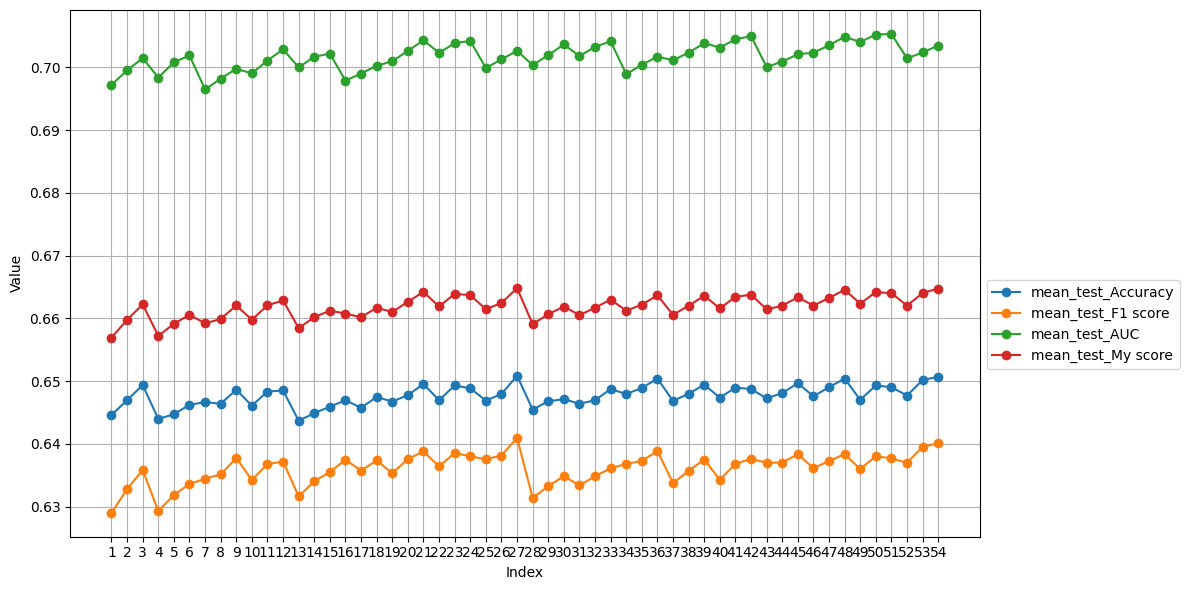

In [ ]:
x = list(range(1, 55))  # x축: 1~54

plt.figure(figsize=(12, 6))
meanlist = ['mean_test_Accuracy',
            'mean_test_F1 score',
            'mean_test_AUC',
            'mean_test_My score']
for mean in meanlist:
    plt.plot(x, results[mean], label=mean, marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(np.arange(1, 55, 1))
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 각 파라미터 조합 별, 성능 출력하기 (Accuracy+F1+AUC 가장 높은 15위까지)
results = bagg.cv_results_
for i in range(len(bagg.cv_results_['params'])):
    rank = results['rank_test_My score'][i]
    if rank <= 15:
        print(f"rank={rank:>3}  |  Acc+F1+AUC/3 = {results['mean_test_My score'][i]:.5f}  |  params = {results['params'][i]}")

rank=  4  |  Acc+F1+AUC/3 = 0.66420  |  params = {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.4, 'n_estimators': 250}
rank=  8  |  Acc+F1+AUC/3 = 0.66389  |  params = {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.6, 'n_estimators': 200}
rank= 10  |  Acc+F1+AUC/3 = 0.66368  |  params = {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.6, 'n_estimators': 250}
rank=  1  |  Acc+F1+AUC/3 = 0.66481  |  params = {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.8, 'n_estimators': 250}
rank= 11  |  Acc+F1+AUC/3 = 0.66365  |  params = {'estimator__max_depth': 15, 'estimator__min_samples_leaf': 1, 'max_features': 0.8, 'n_estimators': 250}
rank= 12  |  Acc+F1+AUC/3 = 0.66358  |  params = {'estimator__max_depth': 15, 'estimator__min_samples_leaf': 2, 'max_features': 0.4, 'n_estimators': 250}
rank= 13  |  Acc+F1+AUC/3 = 0.66341  |  params = {'estimator__max_de

### (3)

In [ ]:
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [250, 300],
    "max_features": [0.8, 0.9],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_leaf': [4, 6, 8]
}

# Accuracy, F1 score, AUC, 셋의 평균값을 모두 기록
# refit="My score"로 지정하여 셋의 평균값이 제일 높았던 파라미터를 이용하여 전체 데이터셋에 대하여 재학습
scoring = {"Accuracy": make_scorer(accuracy_score), "F1 score": make_scorer(f1_score), "AUC": "roc_auc", "My score": my_scorer}
bagg = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit="My score", verbose=1)

bagg.fit(X_train_scaled, y_train)
# bagg.predict(X_val_scaled)
# bagg.best_estimator_.predict(X_val_scaled)

# Print the best parameters and the corresponding score
print("Best parameters: ", bagg.best_params_)
print("Best CV score: {:.6f}".format(bagg.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters:  {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 8, 'max_features': 0.8, 'n_estimators': 250}
Best CV score: 0.665645


In [ ]:
results = bagg.cv_results_
for i, r in enumerate(results['params']):
    print(i+1, r)
attrlist = ['mean_test_Accuracy', 'rank_test_Accuracy',
            'mean_test_F1 score', 'rank_test_F1 score',
            'mean_test_AUC', 'rank_test_AUC',
            'mean_test_My score', 'rank_test_My score']
for attr in attrlist:
    print(attr, ":", results[attr])

1 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.8, 'n_estimators': 250}
2 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.8, 'n_estimators': 300}
3 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.9, 'n_estimators': 250}
4 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'max_features': 0.9, 'n_estimators': 300}
5 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 6, 'max_features': 0.8, 'n_estimators': 250}
6 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 6, 'max_features': 0.8, 'n_estimators': 300}
7 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 6, 'max_features': 0.9, 'n_estimators': 250}
8 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 6, 'max_features': 0.9, 'n_estimators': 300}
9 {'estimator__max_depth': None, 'estimator__min_samples_leaf': 8, 'max_features': 0.8, 'n_estimators': 250}
10 {'estimator__max

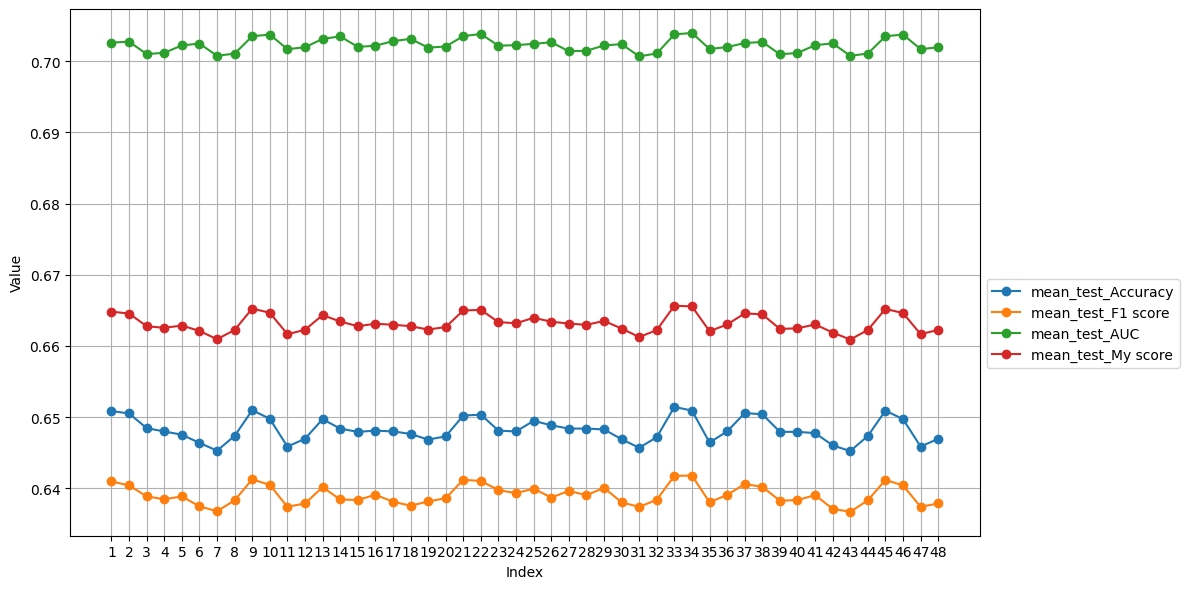

In [16]:
x = list(range(1, 49))

plt.figure(figsize=(12, 6))
meanlist = ['mean_test_Accuracy',
            'mean_test_F1 score',
            'mean_test_AUC',
            'mean_test_My score']
for mean in meanlist:
    plt.plot(x, results[mean], label=mean, marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(np.arange(1, 49, 1))
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

### (4)